In [23]:
import genetic as gen

In [24]:
from perlin_noise import PerlinNoise

In [25]:
import matplotlib.pyplot as plt

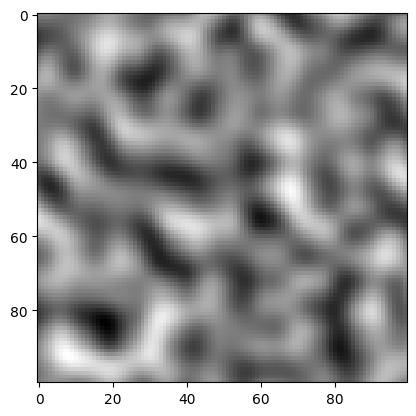

In [26]:
noise = PerlinNoise(octaves=8, seed=3)
xpix, ypix = 100, 100
pic = [[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)]

plt.imshow(pic, cmap='gray')
plt.show()

In [27]:
import numpy as np
from shapely import Point

In [28]:
population_points=np.fromiter((Point(int(i/7)/7,(i%7)/7) for i in range(49)),dtype=object)

first_gen=[gen.Candidate(None,p) for p in population_points]

ge=gen.GeneticPoints(fit_func=lambda p:noise([p.x,1-p.y]),minimize=True)

In [29]:
def plot_comparison(candidates:list):
    ge.calculate_fitness(candidates)

    plt.figure(figsize=(6.0, 3.0))
    plt.subplot(1,2,1)
    xpix, ypix = 100, 100
    pic = [[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)]
    
    plt.imshow(pic, cmap='gray')
    
    plt.subplot(1, 2, 2)
    
    plt.xlim(.0,1.0)
    plt.ylim(.0,1.0)
    
    plt.grid()
    for c in candidates:
        x:float=c.value.x
        y:float=c.value.y
        
        f:float=np.clip(c.fitness,0,1)
        int_val = hex(int(255*(f)))[2:]
        if len(int_val)<2:
            int_val='0'+int_val
        color = '#'+((int_val)*3)
        
        plt.plot([x],[y],marker='o',markersize=10,markeredgecolor=color,markerfacecolor=color)
    plt.show()

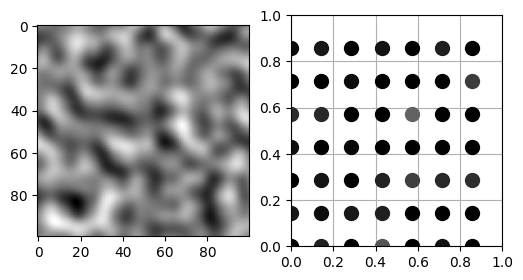

49

In [30]:
plot_comparison(first_gen)
len(first_gen)

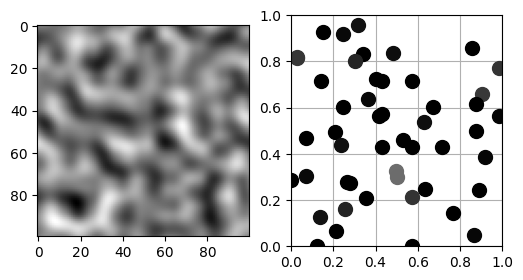

In [31]:
new_gen=ge.next_gen(first_gen)
plot_comparison(new_gen)

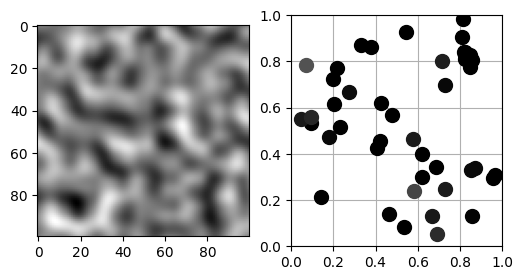

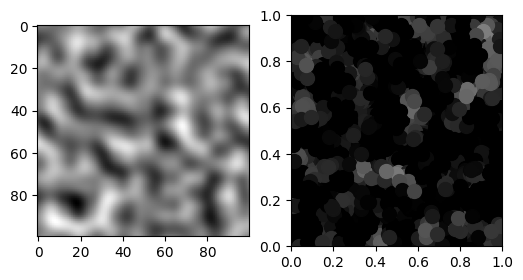

49

In [32]:
from itertools import chain


for i in range(150):
    ge.next_gen()
    
plot_comparison(ge.last_candidates)    
plot_comparison(list(chain(*ge.all_candidates.values())))
len(ge.last_candidates)

In [33]:
print(ge.last_candidates)

[Candidate(fitness=-0.5162457620069358, value=<POINT (0.841 0.817)>), Candidate(fitness=-0.5141595656818043, value=<POINT (0.832 0.823)>), Candidate(fitness=-0.5012104181829146, value=<POINT (0.832 0.811)>), Candidate(fitness=-0.5007945826358351, value=<POINT (0.827 0.827)>), Candidate(fitness=-0.4878755200365441, value=<POINT (0.845 0.829)>), Candidate(fitness=-0.4831667270672258, value=<POINT (0.822 0.83)>), Candidate(fitness=-0.48117004766857485, value=<POINT (0.822 0.831)>), Candidate(fitness=-0.46852524961201636, value=<POINT (0.824 0.81)>), Candidate(fitness=-0.4580783976144788, value=<POINT (0.82 0.84)>), Candidate(fitness=-0.45799549988801835, value=<POINT (0.822 0.842)>), Candidate(fitness=-0.010145891651317615, value=<POINT (0.096 0.534)>), Candidate(fitness=-0.04085876261555697, value=<POINT (0.216 0.772)>), Candidate(fitness=0.3218632500503583, value=<POINT (0.071 0.785)>), Candidate(fitness=-0.09453900212699992, value=<POINT (0.621 0.298)>), Candidate(fitness=-0.0372788274